# HW 15 - Animation
ULAB - Physics and Astronomy Division \
Due **Sunday, March 9th, 2025 at 11:59pm** on Gradescope

## 1 Modify the Animation from Lecture
Modify the given sine wave animation so that the wave moves twice as fast. What parts of the code you you need to change, and why? Please specifically highlight this in your code

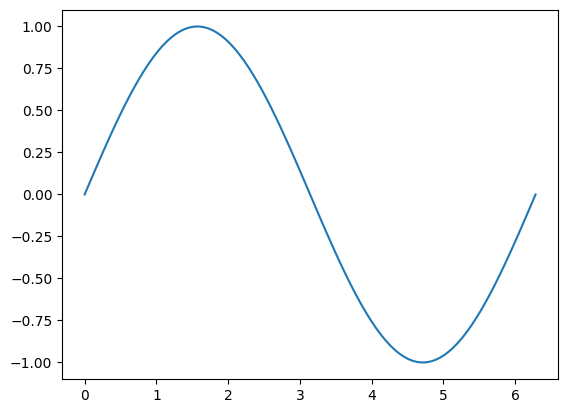

In [1]:
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
# Display the video
#Video("example_solar_system_animation.mp4")

# sin wave animation 
x= np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
fig, ax = plt.subplots()
line, = ax.plot(x, np.sin(x))
def update(frame):
    line.set_ydata(np.sin(x+frame/10.0))
    return line,

ani = animation.FuncAnimation(fig,update, frames=100, interval=100, blit=True)
ani.save("animation.gif", writer="pillow", fps=20)

#to change speed:
#changing the interval 
ani_1 = animation.FuncAnimation(fig,update, frames=100, interval=50, blit=True)


In [ ]:
# there wasnt a given sin wave in my homework for some reason, so I made one of my own, and changed the interval from 100, to 50 to speed up the animation  

Save the animation as a .mp4 or a .gif and include it you repository for submission. 

In [ ]:
# again, my stuff isnt running so i am unable to save anything 
ani_1.save("animation1.gif", writer ="pillow", fps=20)


Explain what happens if you set `blit=True` in `FuncAnimation`? What happens if you set it to `blit=False`?

In [ ]:
# blit= true helps the animation run smoother, since it only updates the changing elements of the animation. setting blit=false causes a slower animation with more glitching since it redraws the full figure each time. 

## 2 A Different Animation
Write an animation where a dot moves in a circular path instead of sine wave. *Hint: You will need to use `np.sin` and `np.cos`. 

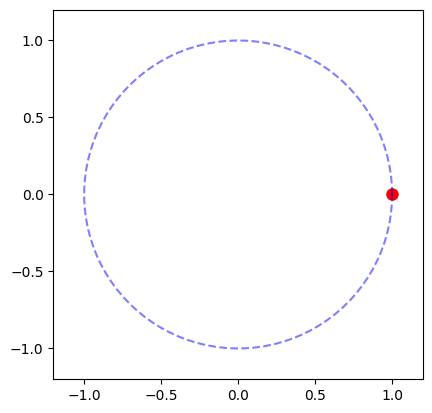

In [2]:

from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()
ax.set_ylim(-1.2,1.2)
ax.set_xlim(-1.2,1.2)
ax.set_aspect('equal')

dot, = ax.plot([],[], 'ro', markersize=8) # setting dot parameters, red dot of size 8

theta = np.linspace(0, 2*np.pi, 100)
ax.plot(np.cos(theta),np.sin(theta), 'b--', alpha=0.5)

def update(frame):
    x=np.cos(frame),
    y=np.sin(frame),
    dot.set_data(x,y)
    return dot,
dot_ani = animation.FuncAnimation(fig,update, frames=np.linspace(0, 2*np.pi, 100), interval=50, blit=True)
                 
plt.show()    

Save the animation as a .mp4 or a .gif and include it you repository for submission. 

In [10]:
dot_ani.save("dot.gif", writer ="pillow", fps=20)

## 3 Simulate Orbital Motion of Planets and a Comet
**Check out the `example_solar_system_animation.mp4` as an example of what you will be creating in this problem.**

Now you will simulate and visualize the orbital motion of Earth, Mars and a coment around the Sun using Newtonian gravity and Python. Here are the steps:
* Calculate the gravitational forces acting on each body.
* Update positions and velocities over time.
* Simulate the motion of these celestial bodies over a period of 5 years.
* Animate the results to observe orbital patterns. 

Let's dig a bit into the physics. The motion of celestial bodies follows **Newton's laws of motion and gravitation**:
$$
F = G \frac{m_1 m_1}{r^2}
$$

where:
* $F$ is the gravitational force.
* $G = 6.67\times10^{-11}$ is the gravitational constant
* $m_1$, $m_2$ are the measses of the two objects.
* $r$ is the distance between them.

Using **Newton's Second Law**, the acceleration is given by:

$$
a = \frac{F}{m}
$$

where $a$ is the acceleration, and $m$ is the object's mass. The velocity and position are updated with numerical integration:

$$
v = v + a \cdot dt
$$

$$
x = x + v \cdot dt
$$

## 3.1 Implementing the Simulation
Goal: Set up the **masses**, **initial positions** and **velocities** for the Sun, Earth, Mars and a comet. 
* Use SI units (meters, kilograms, seconds).
* The Sun is at the origin (0, 0, 0)
* Earth, Mars and the commet start at **aphelion** (farthest from the Sun).

Start by defining the following initial variables in kilograms (or SI units):
* `G`
* `Ms` (the mass of the Sun, you will need to google this)
* `Me` (the mass of the Earth)
* `Mm` (the mass of Mars)
* `Mc = 6.39e20` (the mass of a comet)
* `AU` (astronomical unit, distance between Earth and the Sun)
* `daysec` (how many seconds are in a day)

In [5]:
G = 6.67e-11 
Ms= 2e30 #kg
Me= 6e24 
Mm= 6.417e23 
Mc = 6.39e20
AU= 1.496e11 #m
daysec = 8.64e4 #s
G_e = 3.986e14
G_m = 4.28e23
G_c = 4.26e10
G_s=1.327e20

Now we will define some initial velocities in meters per second:
* `e_ap_v` (Earth at aphelion, google it, make sure its in SI units)
* `m_ap_v` (Mars at aphelion)
* `commet_v = 7000` (speed of the comet)

In [7]:
e_ap_v =2.93e4 #m/s
m_ap_v = 2.197e4 
commet_v = 7000 

Run the cell below to define some gravitational constants because we expect no mass loss:

In [ ]:
# Your code here

Define the initial positions of the Earth, Mars and the comet. Here is the Earth as an example:
* `xe, ye, ze = 1.0167 * AU, 0, 0`

Follow the same pattern for Mars (where the `x` coordinate is at `1.666 * AU`, everything else is zero) and the comet (where the `x` coordinate is at `2* AU`, the `y` coordinate is `0.3 * AU` and the `z` coordinate is zero) . Remember the sun is at the origin! 

In [9]:
#earth coordinates
xe = 1.0167 * AU
ye = 0
ze = 0 
#mars coordinates
xm = 1.666*AU
ym=0
zm=0
#comet coordinates
xc= 2*AU
yc= 0.3*AU
zc= 0

We will do the same thing but for initial velocities. Here is Earth as an example:
* `xve, yve, zve = 0, e_ap_v, 0`

Make variables for Mars but with `m_ap_v` as the `y` coordinate. Make variables for the commet but with `commet_v` as the `y` coordinate.

In [11]:
#earth
xve, yve, zve = 0, e_ap_v, 0
#mars
xvm, yvm, zvm = 0, m_ap_v, 0
#commet
xvc, yvc, zvc = 0, commet_v, 0


Assume the Sun is at the origin. Make initial positions and velocities for the Sun. It should not be moving so all its velocities coordinates are zero. 

In [13]:
#position 
xs, ys, zs = 0,0,0 #m
#initial velocity
xvs, yvs, zvs = 0,0,0 #m/s

Now we will define some time parameters for our simulation. Create variable for the initial time `t` and set it to zero. Create a variable called `dt` for the change in time (steps per day) and set it to `1 * daysec`. Create a varible for `years` and set it to `5`. Finally, create a varible for `sim_years` and set it equal to `years * 365 * daysec`.

In [15]:
t = 0 #inital time 
dt = 1* daysec # change in time 
years = 5 
sim_years = years*365*daysec 

Create empty lists to store all of your varibles. Run the cell below.

In [17]:
# Store the orbits:
#position
xelist = []
yelist = []
xmlist = []
ymlist = []
xclist = []
yclist = []
xslist = []
yslist = []
#velocities
xvelist = []
yvelist = []
xvmlist = []
yvmlist = []
xvclist = []
yvclist = []
xvslist = []
yvslist = []


## 3.2 Compute Gravitational Forces and Update Positions
Goal:
* Implement the **gravitational force equation** to calculate the force acting on each body.
* Compute accelerations using $a = F/m$.
* Update **velocity** and **position**.
* Use a loop to update positions over **5 years**.
* Store the results in lists for plotting.

I will do this part for you, it requires some physics knowledge. But you need to turn this into a loop for when time is less than the simulation time. You want the loop to repeat it itself until that condition is met. 

In [19]:
t = 0 #inital time 
dt = 1* daysec # change in time 
years = 5 
sim_years = years*365*daysec 

################ Earth #############
while t < sim_years:
    rx, ry, rz = xe - xs, ye - ys, ze - zs
    modr3_e = (rx**2 + ry**2 + rz**2)**1.5
    fx_e = -G_e * rx / modr3_e
    fy_e = -G_e * ry / modr3_e
    xve += fx_e * dt / Me
    yve += fy_e * dt / Me
    xe += xve * dt
    ye += yve * dt
    xelist.append(xe)
    yelist.append(ye)

################ Mars ##############
    rx_m, ry_m, rz_m = xm - xs, ym - ys, zm - zs
    modr3_m = (rx_m**2 + ry_m**2 + rz_m**2)**1.5
    fx_m = -G_m* rx_m / modr3_m
    fy_m = -G_m * ry_m / modr3_m
    
    xvm += fx_m * dt / Mm
    yvm += fy_m * dt / Mm
    xm += xvm * dt
    ym += yvm * dt
    
    xmlist.append(xm)
    ymlist.append(ym)

################ Comet ##############
    rx_c, ry_c, rz_c = xc - xs, yc - ys, zc - zs
    modr3_c = (rx_c**2 + ry_c**2 + rz_c**2)**1.5
    fx_c = -G_c * rx_c / modr3_c
    fy_c = -G_c * ry_c / modr3_c
    
    xvc += fx_c * dt / Mc
    yvc += fy_c * dt / Mc
    xc += xvc * dt
    yc += yvc * dt
    
    xclist.append(xc)
    yclist.append(yc)

################ Sun ##############
    xvs += -(fx_e + fx_m) * dt / Ms
    yvs += -(fy_e + fy_m) * dt / Ms
    xs += xvs * dt
    ys += yvs * dt
    xslist.append(xs)
    yslist.append(ys)

    t += dt

## 3.3 Visualization
Goal: Plot the Orbits
* After simulating the motion, **plot the orbits of Earth, Mars and the comet**.
* Label the **Sun**, **Earth**, **Mars**, and **Comet**.

Start by making a figure, set the argument of`figsize=(8, 8)`.
* Plot the `yelist` as a function of `xelist`. Do this for the `xm`, `xc` and `xs` lists as well. Make sure each line is a **different color**!
  * The Sun will just be a point, so give it a markersize of `10`. Make it yellow.  
* Give it a legend
* Add an `xlabel` of `"X Position (m)"`.
* Add an `ylabel` of `"Y Position (m)"`.
* Give it a title.
* Add a grid.
* Show the plot.

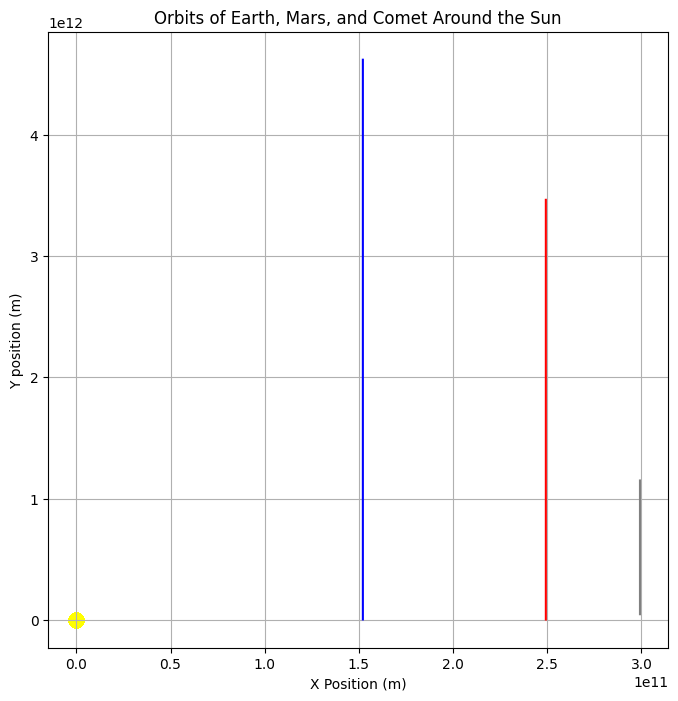

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
#earth
plt.plot(xelist, yelist, label="Earth", color='blue')
#mars
plt.plot(xmlist, ymlist, label="Mars", color='red')
#comet
plt.plot(xclist, yclist, label="Comet", color='grey')
#sun
plt.scatter(xslist, yslist, label="Sun", color='yellow', s= 100)

plt.xlabel("X Position (m)")
plt.ylabel("Y position (m)")
plt.title("Orbits of Earth, Mars, and Comet Around the Sun")

plt.grid(True)
plt.show()


Goal: Animate the Motion
* Create an animated visualization of planetary orbits.
* Track the motion of each body over time.

\
Follow the procedure from lecture. Here are some hints:
* Set the `x` and `y` limits to `-3 * AU` to `3 * AU`. \


* Unpack the lines for Earth, Mars, the commet. Example: 
  * `line_e = axplot([], [], '-g', lw=1)` \

  
* Unpack the points for Earth, Mars, the commet and the Sun. Example:
  * `point_e, = ax.plot([],[],'bo',markersize=4)` \

* Give a title to each of the objects. Example:
  * `text_e  = ax.text(AU,0,'Earth')`

* Create the `update` function and update the lines, points and text you just unpacked. Example:
  * `line_e.set_data(xelist[:i], yelist[:i])` 
  * `point_e.set_data(xelist[i], yelist[i])`\
  * `text_e.set_position((xelist[i],yelist[i]))`


* Create the animation! Set `frames = len(xelist)`, `interval=1` and `blit=True`. 

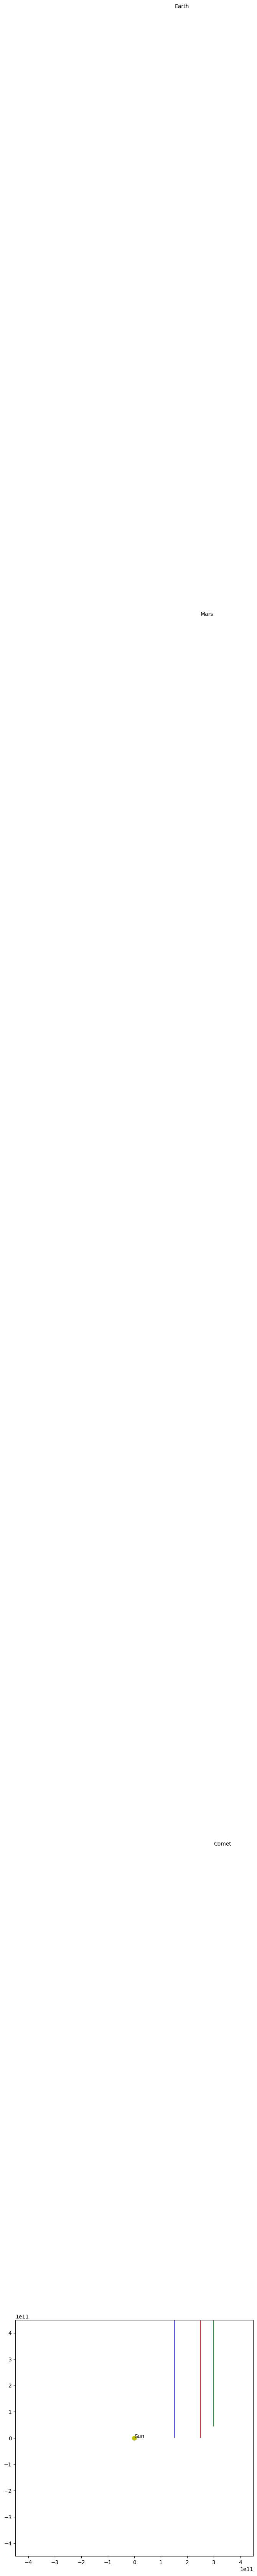

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim(-3*AU, 3*AU)
ax.set_ylim(-3*AU, 3*AU)
#lines
line_e, = ax.plot([], [], '-b', lw=1, label='Earth')
line_m, = ax.plot([], [], '-r', lw=1, label='Mars')
line_c, = ax.plot([], [], '-g', lw=1, label = 'Comet')
#points
point_e, = ax.plot([],[],'bo',markersize=4)
point_m, = ax.plot([],[],'ro',markersize=4)
point_c, = ax.plot([],[],'go',markersize=4)
point_s, = ax.plot([], [], 'yo', markersize=8)
#labels 
text_e  = ax.text(AU,0,'Earth')
text_m  = ax.text(AU,0,'Mars')
text_c  = ax.text(AU,0,'Comet')
text_s  = ax.text(AU,0,'Sun')
#update function 
def update(i):
    #earth
    line_e.set_data(xelist[:i], yelist[:i])
    point_e.set_data([xelist[i]], [yelist[i]])
    text_e.set_position((xelist[i],yelist[i]))
    #mars
    line_m.set_data(xmlist[:i], ymlist[:i])
    point_m.set_data([xmlist[i]], [ymlist[i]])
    text_m.set_position((xmlist[i], ymlist[i]))
    #comet
    line_c.set_data(xclist[:i], yclist[:i])
    point_c.set_data([xclist[i]], [yclist[i]])
    text_c.set_position((xclist[i], yclist[i]))
    #sun 
    point_s.set_data([xslist[0]], [yslist[0]])
    text_s.set_position((xslist[0], yslist[0]))

    return line_e, point_e, text_e, line_m, point_m, text_m, line_c, point_c, text_c, point_s, text_s

orbits = animation.FuncAnimation(fig, update, frames=len(xelist), interval=10, blit=True)
orbits.save("orbits.gif", writer="pillow", fps=20)

## 3.4 Add Mercury, Venus and the Moon!
As an extra challenge, give your best attempt at simulating Mercury, Venus and/or the Moon! I am not going to give you a ton of hints for this problem. Come to office hours if you have questions :)

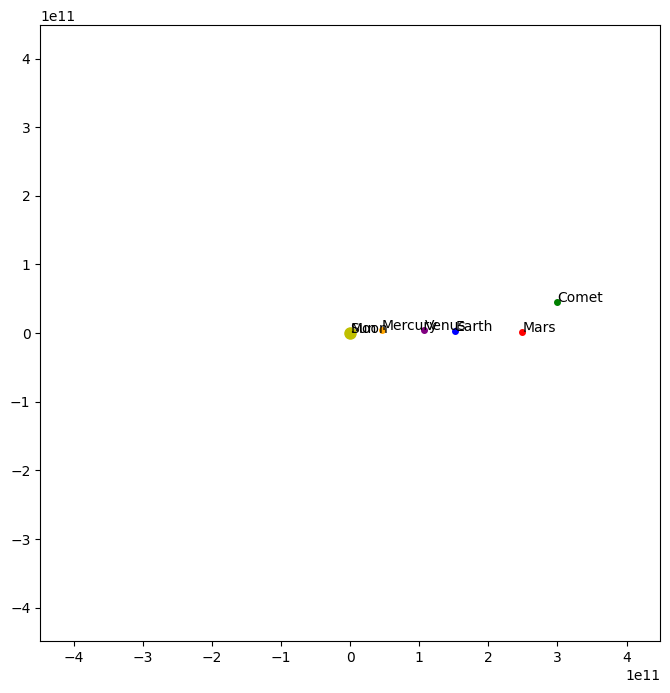

In [32]:
import matplotlib.pyplot as plt
Mmc = 3.301e23 #mercury mass kg
Mv = 4.867e24 #venus mass kg
Mmo = 7.432e22 #moon mass kg 
G_mc = 2.203e13 #gravitational constant for mercury 
G_v = 4.867e24 
G_mo = 7.342e22
#velocities at perihelion 
mc_ap_v = 5.898e4 #mercury 
v_ap_v =  5.526e4 #venus
mo_ap_v = 1.095e3 #moon 

#initial positions 
#mercury
xmc = 0.3075*AU
ymc = 0
zmc = 0
#venus 
xv = .718*AU
yv= 0
zv= 0 
#moon
xmo = .00257*AU
ymo= 0
zmo=0 

#inital velocities 
#mercury
xvmc, yvmc, zvmc = 0, mc_ap_v, 0
#venus
xvv, yvv, zvv = 0, v_ap_v, 0
#moon
xvmo, yvmo, zvmo = 0, mo_ap_v, 0

#position lists 
xmclist = []
ymclist = []
xvlist = []
yvlist = []
xmolist = []
ymolist = []
#velocity list
xvmclist = []
yvmclist = []
xvvlist = []
yvvlist = []
xvmolist = []
yvmolist = []

#loop 
t = 0 #inital time 
dt = 1* daysec # change in time 
years = 5 
sim_years = years*365*daysec 

################ Earth #############
while t < sim_years:
    rx, ry, rz = xe - xs, ye - ys, ze - zs
    modr3_e = (rx**2 + ry**2 + rz**2)**1.5
    fx_e = -G_e * rx / modr3_e
    fy_e = -G_e * ry / modr3_e
    xve += fx_e * dt / Me
    yve += fy_e * dt / Me
    xe += xve * dt
    ye += yve * dt
    xelist.append(xe)
    yelist.append(ye)

################ Mars ##############
    rx_m, ry_m, rz_m = xm - xs, ym - ys, zm - zs
    modr3_m = (rx_m**2 + ry_m**2 + rz_m**2)**1.5
    fx_m = -G_m* rx_m / modr3_m
    fy_m = -G_m * ry_m / modr3_m
    
    xvm += fx_m * dt / Mm
    yvm += fy_m * dt / Mm
    xm += xvm * dt
    ym += yvm * dt
    
    xmlist.append(xm)
    ymlist.append(ym)

################ Comet ##############
    rx_c, ry_c, rz_c = xc - xs, yc - ys, zc - zs
    modr3_c = (rx_c**2 + ry_c**2 + rz_c**2)**1.5
    fx_c = -G_c * rx_c / modr3_c
    fy_c = -G_c * ry_c / modr3_c
    
    xvc += fx_c * dt / Mc
    yvc += fy_c * dt / Mc
    xc += xvc * dt
    yc += yvc * dt
    
    xclist.append(xc)
    yclist.append(yc)

################ Sun ##############
    xvs += -(fx_e + fx_m) * dt / Ms
    yvs += -(fy_e + fy_m) * dt / Ms
    xs += xvs * dt
    ys += yvs * dt
    xslist.append(xs)
    yslist.append(ys)
################ Mercury ##############
    rx_mc, ry_mc, rz_mc = xmc -xs, ymc -ys, zmc-zs
    modr3_mc = (rx_mc**2 + ry_mc**2 + rz_mc**2)**1.5
    fx_mc = -G_mc * rx_mc / modr3_mc
    fy_mc = -G_mc * ry_mc / modr3_mc
    
    xvmc += fx_mc * dt / Mmc
    yvmc += fy_mc * dt / Mmc
    xmc += xvmc * dt
    ymc += yvmc * dt
    
    xmclist.append(xmc)
    ymclist.append(ymc)
################ Venus ##############
    rx_v, ry_v, rz_v = xv -xs, yv -ys, zv-zs
    modr3_v = (rx_v**2 + ry_v**2 + rz_v**2)**1.5
    fx_v = -G_v * rx_v / modr3_v
    fy_v = -G_v * ry_v / modr3_v
    
    xvv += fx_v * dt / Mv
    yvv += fy_v * dt / Mv
    xv += xvv * dt
    yv += yvv * dt
    
    xvlist.append(xv)
    yvlist.append(yv)
################ Moon ##############
    rx_mo, ry_mo, rz_mo = xmo -xs, ymo -ys, zmo-zs
    modr3_mo = (rx_mo**2 + ry_mo**2 + rz_mo**2)**1.5
    fx_mo = -G_mo * rx_mo / modr3_mo
    fy_mo = -G_mo * ry_mo / modr3_mo
    
    xvmo += fx_mo * dt / Mmo
    yvmo += fy_mo * dt / Mmo
    xmo += xvmo * dt
    ymo += yvmo * dt
    
    xmolist.append(xmo)
    ymolist.append(ymo)
    
    t += dt

#animate
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim(-3*AU, 3*AU)
ax.set_ylim(-3*AU, 3*AU)
#lines
line_e, = ax.plot([], [], '-b', lw=1, label='Earth')
line_m, = ax.plot([], [], '-r', lw=1, label='Mars')
line_c, = ax.plot([], [], '-', color='grey', lw=1, label = 'Comet')
line_mc, = ax.plot([], [], '-', color='orange', lw=1, label = 'Mercury')
line_v, = ax.plot([], [], '-',color= 'purple', lw=1, label = 'Venus')
line_mo, = ax.plot([], [], '-', color='black', lw=1, label = 'Moon')
#points
point_e, = ax.plot([],[],'bo',markersize=4)
point_m, = ax.plot([],[],'ro',markersize=4)
point_c, = ax.plot([],[],'go',markersize=4)
point_mc, = ax.plot([],[],'o',color='orange',markersize=4)
point_v, = ax.plot([],[], 'o', color='purple',markersize=4)
point_mo, = ax.plot([],[],'o', color='black', markersize=4)
point_s, = ax.plot([], [], 'yo', markersize=8)
#labels 
text_e  = ax.text(AU,0,'Earth')
text_m  = ax.text(AU,0,'Mars')
text_c  = ax.text(AU,0,'Comet')
text_s  = ax.text(AU,0,'Sun')
text_mc  = ax.text(AU,0,'Mercury')
text_v  = ax.text(AU,0,'Venus')
text_mo  = ax.text(AU,0,'Moon')
#update function 
def update(i):
    #earth
    line_e.set_data(xelist[:i], yelist[:i])
    point_e.set_data([xelist[i]], [yelist[i]])
    text_e.set_position((xelist[i],yelist[i]))
    #mars
    line_m.set_data(xmlist[:i], ymlist[:i])
    point_m.set_data([xmlist[i]], [ymlist[i]])
    text_m.set_position((xmlist[i], ymlist[i]))
    #comet
    line_c.set_data(xclist[:i], yclist[:i])
    point_c.set_data([xclist[i]], [yclist[i]])
    text_c.set_position((xclist[i], yclist[i]))
    #mercury
    line_mc.set_data(xmclist[:i], ymclist[:i])
    point_mc.set_data([xmclist[i]], [ymclist[i]])
    text_mc.set_position((xmclist[i], ymclist[i]))
    #venus
    line_v.set_data(xvlist[:i], yvlist[:i])
    point_v.set_data([xvlist[i]], [yvlist[i]])
    text_v.set_position((xvlist[i], yvlist[i]))
    #moon
    line_mo.set_data(xmolist[:i], ymolist[:i])
    point_mo.set_data([xmolist[i]], [ymolist[i]])
    text_mo.set_position((xmolist[i], ymolist[i]))
    #sun 
    point_s.set_data([xslist[0]], [yslist[0]])
    text_s.set_position((xslist[0], yslist[0]))

    return line_e, point_e, text_e, line_m, point_m, text_m, line_c, point_c, text_c, point_s, text_s, line_mc, point_mc, text_mc, line_v, point_v, text_v, line_mo, point_mo, text_mo 

orbits_2 = animation.FuncAnimation(fig, update, frames=len(xelist), interval=10, blit=True)

Save you animation as a `.gif` or as a `.mp4`. Include this in your submission! This may take up to a couple mintutes!

In [ ]:
# Your code here
orbits_2.save("orbits_2.gif", writer="pillow", fps=20)

Upload this notebook and your animations to Gradescope!